# EMPLOYEE ATTRITION PREDICTION

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
dataset = pd.read_csv("EmployeeAttrition (1).csv")

In [3]:
dataset

,Education,JobInvolvement,JobLevel,DailyRate(USD),MonthlyIncome(USD),NoofCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,TrainingTimesLastYear,PerformanceRating,Attrition
0,College,High,2,1102,5993,8,8,6,4,0,5,0,Excellent,Yes
1,Below College,Medium,2,279,5130,1,10,10,7,1,7,3,Outstanding,No
2,College,Medium,1,1373,2090,6,7,0,0,0,0,3,Excellent,Yes
3,Master,High,1,1392,2909,1,8,8,7,3,0,3,Excellent,No
4,Below College,High,1,591,3468,9,6,2,2,2,2,3,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,College,Very High,2,884,2571,4,17,5,2,0,3,3,Excellent,No
1466,Below College,Medium,3,613,9991,4,9,7,7,1,7,5,Excellent,No
1467,Bachelor,Very High,2,155,6142,1,6,6,2,0,3,0,Outstanding,No
1468,Bachelor,Medium,2,1023,5390,2,17,9,6,0,8,3,Excellent,No


In [4]:
dataset['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [5]:
#checking the null value in the dataset
dataset.isnull().any()

Education                  False
JobInvolvement             False
JobLevel                   False
DailyRate(USD)             False
MonthlyIncome(USD)         False
NoofCompaniesWorked        False
TotalWorkingYears          False
YearsAtCompany             False
YearsInCurrentRole         False
YearsSinceLastPromotion    False
YearsWithCurrentManager    False
TrainingTimesLastYear      False
PerformanceRating          False
Attrition                  False
dtype: bool

In [6]:
dataset.describe()

,JobLevel,DailyRate(USD),MonthlyIncome(USD),NoofCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,TrainingTimesLastYear
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.063946,802.485714,6502.931293,2.693197,11.279592,7.008163,4.229252,2.187755,4.123129,2.799320
std,1.106940,403.509100,4707.956783,2.498009,7.780782,6.126525,3.623137,3.222430,3.568136,1.289271
min,1.000000,102.000000,1009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,465.000000,2911.000000,1.000000,6.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,2.000000,802.000000,4919.000000,2.000000,10.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,3.000000,1157.000000,8379.000000,4.000000,15.000000,9.000000,7.000000,3.000000,7.000000,3.000000
max,5.000000,1499.000000,19999.000000,9.000000,40.000000,40.000000,18.000000,15.000000,17.000000,6.000000


In [7]:
dataset.corr()

,JobLevel,DailyRate(USD),MonthlyIncome(USD),NoofCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,TrainingTimesLastYear
JobLevel,1.000000,0.002966,0.950300,0.142501,0.782208,0.534739,0.389447,0.353885,0.375281,-0.018191
DailyRate(USD),0.002966,1.000000,0.007707,0.038153,0.014515,-0.034055,0.009932,-0.033229,-0.026363,0.002453
MonthlyIncome(USD),0.950300,0.007707,1.000000,0.149515,0.772893,0.514285,0.363818,0.344978,0.344079,-0.021736
NoofCompaniesWorked,0.142501,0.038153,0.149515,1.000000,0.237639,-0.118421,-0.090754,-0.036814,-0.110319,-0.066054
TotalWorkingYears,0.782208,0.014515,0.772893,0.237639,1.000000,0.628133,0.460365,0.404858,0.459188,-0.035662
YearsAtCompany,0.534739,-0.034055,0.514285,-0.118421,0.628133,1.000000,0.758754,0.618409,0.769212,0.003569
YearsInCurrentRole,0.389447,0.009932,0.363818,-0.090754,0.460365,0.758754,1.000000,0.548056,0.714365,-0.005738
YearsSinceLastPromotion,0.353885,-0.033229,0.344978,-0.036814,0.404858,0.618409,0.548056,1.000000,0.510224,-0.002067
YearsWithCurrentManager,0.375281,-0.026363,0.344079,-0.110319,0.459188,0.769212,0.714365,0.510224,1.000000,-0.004096
TrainingTimesLastYear,-0.018191,0.002453,-0.021736,-0.066054,-0.035662,0.003569,-0.005738,-0.002067,-0.004096,1.000000


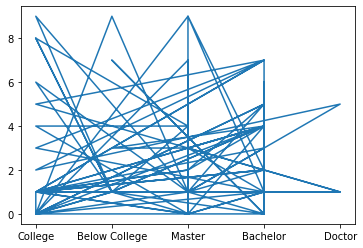

In [8]:
#data Visualization
plt.plot(dataset.iloc[0:100,0],dataset.iloc[0:100,5])

In [9]:
type(dataset)

pandas.core.frame.DataFrame

In [10]:
df = pd.DataFrame(dataset)

In [11]:
type(dataset)

pandas.core.frame.DataFrame

In [12]:
df

,Education,JobInvolvement,JobLevel,DailyRate(USD),MonthlyIncome(USD),NoofCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,TrainingTimesLastYear,PerformanceRating,Attrition
0,College,High,2,1102,5993,8,8,6,4,0,5,0,Excellent,Yes
1,Below College,Medium,2,279,5130,1,10,10,7,1,7,3,Outstanding,No
2,College,Medium,1,1373,2090,6,7,0,0,0,0,3,Excellent,Yes
3,Master,High,1,1392,2909,1,8,8,7,3,0,3,Excellent,No
4,Below College,High,1,591,3468,9,6,2,2,2,2,3,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,College,Very High,2,884,2571,4,17,5,2,0,3,3,Excellent,No
1466,Below College,Medium,3,613,9991,4,9,7,7,1,7,5,Excellent,No
1467,Bachelor,Very High,2,155,6142,1,6,6,2,0,3,0,Outstanding,No
1468,Bachelor,Medium,2,1023,5390,2,17,9,6,0,8,3,Excellent,No


In [13]:
#finding out of differnt values that are present in the Education column
df['Education'].value_counts()

Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64

In [14]:
#importing Label Encoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [15]:
#converting x[:,1] default(catagorical variable) to numeric values
df.iloc[:,1]=lb.fit_transform(df.iloc[:,1])
df

,Education,JobInvolvement,JobLevel,DailyRate(USD),MonthlyIncome(USD),NoofCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,TrainingTimesLastYear,PerformanceRating,Attrition
0,College,0,2,1102,5993,8,8,6,4,0,5,0,Excellent,Yes
1,Below College,2,2,279,5130,1,10,10,7,1,7,3,Outstanding,No
2,College,2,1,1373,2090,6,7,0,0,0,0,3,Excellent,Yes
3,Master,0,1,1392,2909,1,8,8,7,3,0,3,Excellent,No
4,Below College,0,1,591,3468,9,6,2,2,2,2,3,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,College,3,2,884,2571,4,17,5,2,0,3,3,Excellent,No
1466,Below College,2,3,613,9991,4,9,7,7,1,7,5,Excellent,No
1467,Bachelor,3,2,155,6142,1,6,6,2,0,3,0,Outstanding,No
1468,Bachelor,2,2,1023,5390,2,17,9,6,0,8,3,Excellent,No


In [16]:
#converting x[:,12] default(catagorical variable) to numeric values
df.iloc[:,12]=lb.fit_transform(df.iloc[:,12])
df

,Education,JobInvolvement,JobLevel,DailyRate(USD),MonthlyIncome(USD),NoofCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,TrainingTimesLastYear,PerformanceRating,Attrition
0,College,0,2,1102,5993,8,8,6,4,0,5,0,0,Yes
1,Below College,2,2,279,5130,1,10,10,7,1,7,3,1,No
2,College,2,1,1373,2090,6,7,0,0,0,0,3,0,Yes
3,Master,0,1,1392,2909,1,8,8,7,3,0,3,0,No
4,Below College,0,1,591,3468,9,6,2,2,2,2,3,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,College,3,2,884,2571,4,17,5,2,0,3,3,0,No
1466,Below College,2,3,613,9991,4,9,7,7,1,7,5,0,No
1467,Bachelor,3,2,155,6142,1,6,6,2,0,3,0,1,No
1468,Bachelor,2,2,1023,5390,2,17,9,6,0,8,3,0,No


In [17]:
#converting x[:,13] default(catagorical variable) to numeric values
df.iloc[:,13]=lb.fit_transform(df.iloc[:,13])
df

,Education,JobInvolvement,JobLevel,DailyRate(USD),MonthlyIncome(USD),NoofCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,TrainingTimesLastYear,PerformanceRating,Attrition
0,College,0,2,1102,5993,8,8,6,4,0,5,0,0,1
1,Below College,2,2,279,5130,1,10,10,7,1,7,3,1,0
2,College,2,1,1373,2090,6,7,0,0,0,0,3,0,1
3,Master,0,1,1392,2909,1,8,8,7,3,0,3,0,0
4,Below College,0,1,591,3468,9,6,2,2,2,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,College,3,2,884,2571,4,17,5,2,0,3,3,0,0
1466,Below College,2,3,613,9991,4,9,7,7,1,7,5,0,0
1467,Bachelor,3,2,155,6142,1,6,6,2,0,3,0,1,0
1468,Bachelor,2,2,1023,5390,2,17,9,6,0,8,3,0,0


In [18]:
#importing OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [19]:
ct1=ColumnTransformer([("jb",OneHotEncoder(),[0])],remainder='passthrough')
df=ct1.fit_transform(df)
df

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 3., 1., 0.],
       [0., 0., 1., ..., 3., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 3., 0., 0.],
       [1., 0., 0., ..., 3., 0., 0.]])

In [20]:
df=df[:,]

In [21]:
df1 = pd.DataFrame(df)

In [22]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1102.0,5993.0,8.0,8.0,6.0,4.0,0.0,5.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,2.0,2.0,279.0,5130.0,1.0,10.0,10.0,7.0,1.0,7.0,3.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1373.0,2090.0,6.0,7.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1392.0,2909.0,1.0,8.0,8.0,7.0,3.0,0.0,3.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,591.0,3468.0,9.0,6.0,2.0,2.0,2.0,2.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,0.0,1.0,0.0,0.0,3.0,2.0,884.0,2571.0,4.0,17.0,5.0,2.0,0.0,3.0,3.0,0.0,0.0
1466,0.0,1.0,0.0,0.0,0.0,2.0,3.0,613.0,9991.0,4.0,9.0,7.0,7.0,1.0,7.0,5.0,0.0,0.0
1467,1.0,0.0,0.0,0.0,0.0,3.0,2.0,155.0,6142.0,1.0,6.0,6.0,2.0,0.0,3.0,0.0,1.0,0.0
1468,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1023.0,5390.0,2.0,17.0,9.0,6.0,0.0,8.0,3.0,0.0,0.0


In [23]:
from scipy import stats

In [24]:
z=np.abs(stats.zscore(df))
z

array([[0.79810466, 0.36162029, 2.05250236, ..., 2.17198183, 0.42623002,
        2.28090588],
       [0.79810466, 2.76533159, 0.48721016, ..., 0.15570708, 2.34615106,
        0.4384223 ],
       [0.79810466, 0.36162029, 2.05250236, ..., 0.15570708, 0.42623002,
        2.28090588],
       ...,
       [1.2529685 , 0.36162029, 0.48721016, ..., 2.17198183, 2.34615106,
        0.4384223 ],
       [1.2529685 , 0.36162029, 0.48721016, ..., 0.15570708, 0.42623002,
        0.4384223 ],
       [1.2529685 , 0.36162029, 0.48721016, ..., 0.15570708, 0.42623002,
        0.4384223 ]])

In [25]:
threshold = 3
np.where(z>threshold)

(array([  28,   45,   52,   56,   61,   62,   62,   63,   64,   85,   98,
          98,  110,  123,  123,  123,  126,  126,  126,  142,  151,  153,
         169,  178,  187,  187,  190,  190,  208,  218,  231,  231,  237,
         237,  270,  270,  281,  326,  329,  337,  348,  358,  386,  386,
         398,  401,  411,  421,  425,  425,  427,  444,  445,  445,  455,
         466,  466,  473,  477,  491,  503,  535,  545,  559,  560,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  705,  716,  746,  749,  752,  773,  786,  799,
         838,  861,  861,  875,  875,  878,  887,  894,  908,  914,  914,
         918,  922,  926,  926,  937,  956,  962,  976,  976, 1008, 1014,
        1024, 1026, 1028, 1033, 1043, 1051, 1074, 1078, 1078, 1086, 1086,
        1086, 1093, 1111, 1111, 1116, 1116, 1116, 1135, 1138, 1138, 1138,
        1142, 1148, 1150, 1156, 1165, 1166, 1177, 1184, 1184, 1221, 1223,
        1236, 1242, 1295, 1301, 1301, 

In [26]:
df_no_outlier = df[(z<3).all(axis=1)]
df_no_outlier

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 3., 1., 0.],
       [0., 0., 1., ..., 3., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 3., 0., 0.],
       [1., 0., 0., ..., 3., 0., 0.]])

In [27]:
type(df_no_outlier)

numpy.ndarray

In [28]:
df_no_outlier.shape

(1346, 18)

In [29]:
df2 = pd.DataFrame(df_no_outlier)
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1102.0,5993.0,8.0,8.0,6.0,4.0,0.0,5.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,2.0,2.0,279.0,5130.0,1.0,10.0,10.0,7.0,1.0,7.0,3.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1373.0,2090.0,6.0,7.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1392.0,2909.0,1.0,8.0,8.0,7.0,3.0,0.0,3.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,591.0,3468.0,9.0,6.0,2.0,2.0,2.0,2.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,0.0,0.0,1.0,0.0,0.0,3.0,2.0,884.0,2571.0,4.0,17.0,5.0,2.0,0.0,3.0,3.0,0.0,0.0
1342,0.0,1.0,0.0,0.0,0.0,2.0,3.0,613.0,9991.0,4.0,9.0,7.0,7.0,1.0,7.0,5.0,0.0,0.0
1343,1.0,0.0,0.0,0.0,0.0,3.0,2.0,155.0,6142.0,1.0,6.0,6.0,2.0,0.0,3.0,0.0,1.0,0.0
1344,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1023.0,5390.0,2.0,17.0,9.0,6.0,0.0,8.0,3.0,0.0,0.0


In [30]:
x= df2.iloc[:,0:17].values
x

array([[0., 0., 1., ..., 5., 0., 0.],
       [0., 1., 0., ..., 7., 3., 1.],
       [0., 0., 1., ..., 0., 3., 0.],
       ...,
       [1., 0., 0., ..., 3., 0., 1.],
       [1., 0., 0., ..., 8., 3., 0.],
       [1., 0., 0., ..., 2., 3., 0.]])

In [31]:
y= df2.iloc[:,-1].values
y

array([1., 0., 1., ..., 0., 0., 0.])

In [32]:
#Normalization using standard scalar
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [33]:
x=sc.fit_transform(x)
x

array([[-0.8134669 , -0.37248877,  1.98709069, ...,  0.36911986,
        -2.16537277, -0.42509029],
       [-0.8134669 ,  2.68464468, -0.50324829, ...,  0.983255  ,
         0.15577808,  2.35244141],
       [-0.8134669 , -0.37248877,  1.98709069, ..., -1.16621799,
         0.15577808, -0.42509029],
       ...,
       [ 1.22930632, -0.37248877, -0.50324829, ..., -0.24501528,
        -2.16537277,  2.35244141],
       [ 1.22930632, -0.37248877, -0.50324829, ...,  1.29032257,
         0.15577808, -0.42509029],
       [ 1.22930632, -0.37248877, -0.50324829, ..., -0.55208285,
         0.15577808, -0.42509029]])

In [34]:
from joblib import dump
dump(sc,"transform.save")

['transform.save']

In [35]:
#Splitting of Data into Train And Test
from sklearn.model_selection import train_test_split  #previously cros_validation was used in sklearn
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [36]:
#Training And Testing the Model(using LogisticRegression)
from sklearn.linear_model import LogisticRegression

In [37]:
lr= LogisticRegression()

In [38]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
from joblib import dump
dump(lr,"model.save")

['model.save']

In [40]:
y_pred=lr.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [41]:
y_test

array([0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [42]:
#Evaluation(finding the Accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8444444444444444

In [43]:
x.shape

(1346, 17)

In [44]:
y.shape

(1346,)

In [45]:
x_test.shape

(135, 17)

In [46]:
y_test.shape

(135,)